<a href="https://colab.research.google.com/github/NgBlaze/AirBnB_clone/blob/main/Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


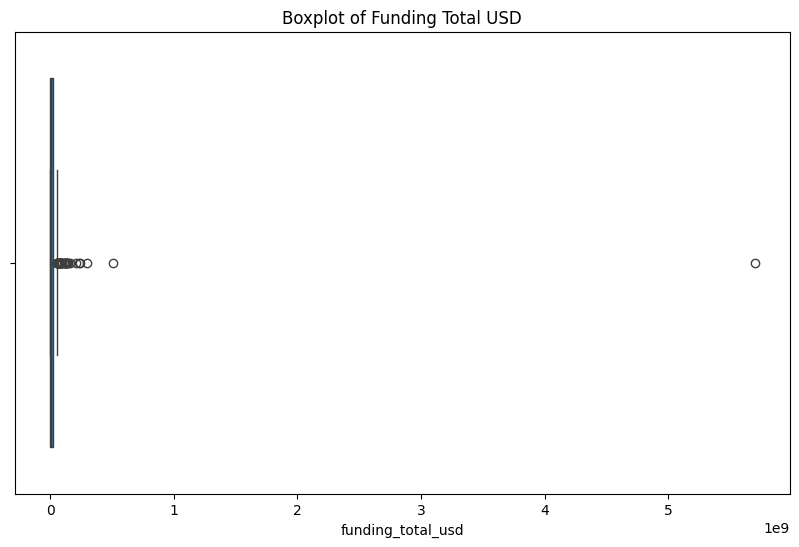


Number of outliers in funding_total_usd: 65


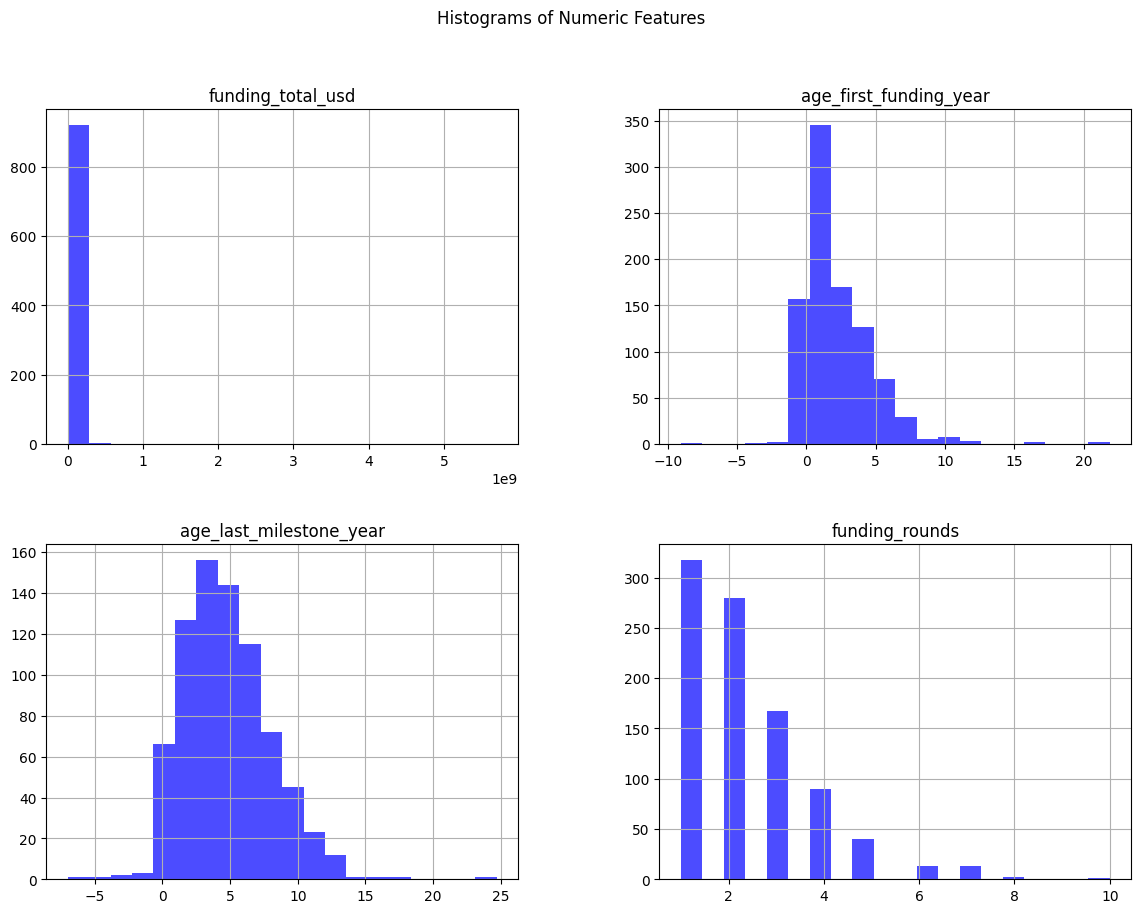

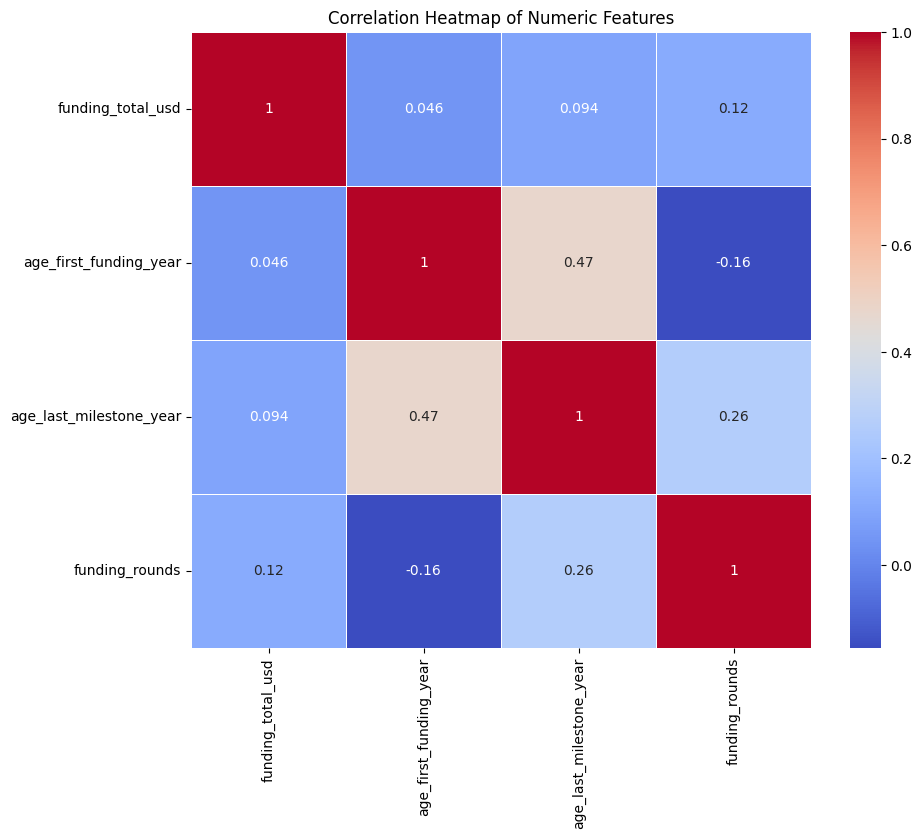

<ipython-input-1-41cacdd7e55b>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


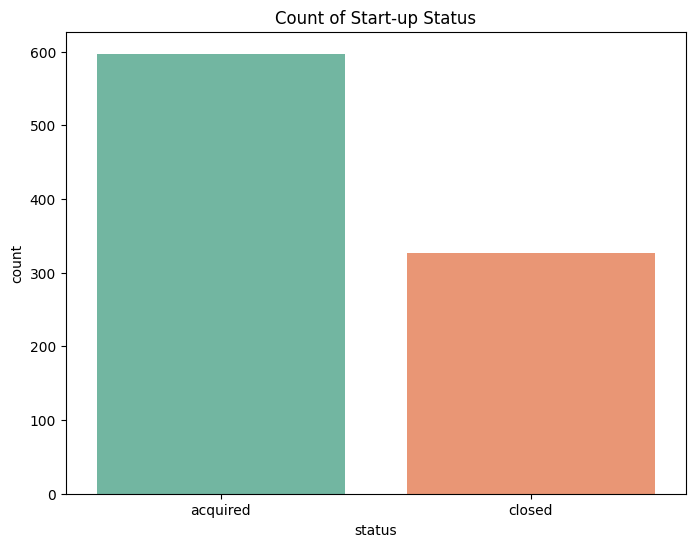

<ipython-input-1-41cacdd7e55b>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category_code', data=df, order=df['category_code'].value_counts().index, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: 

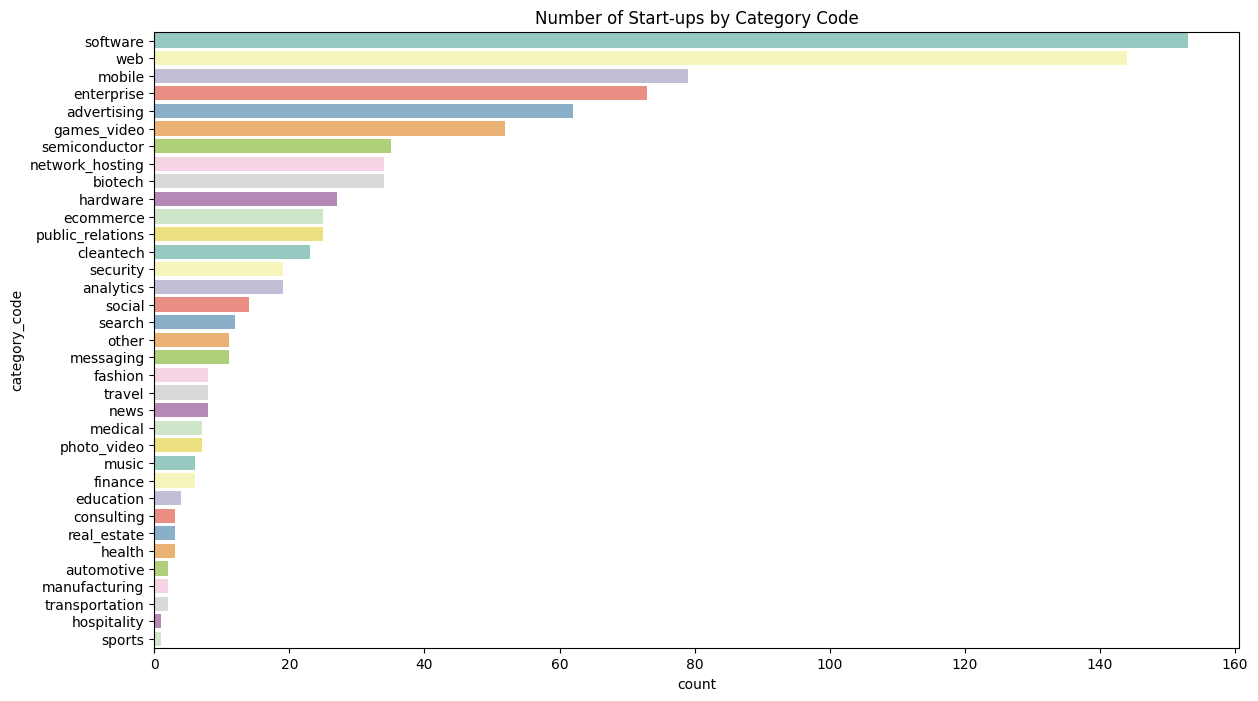

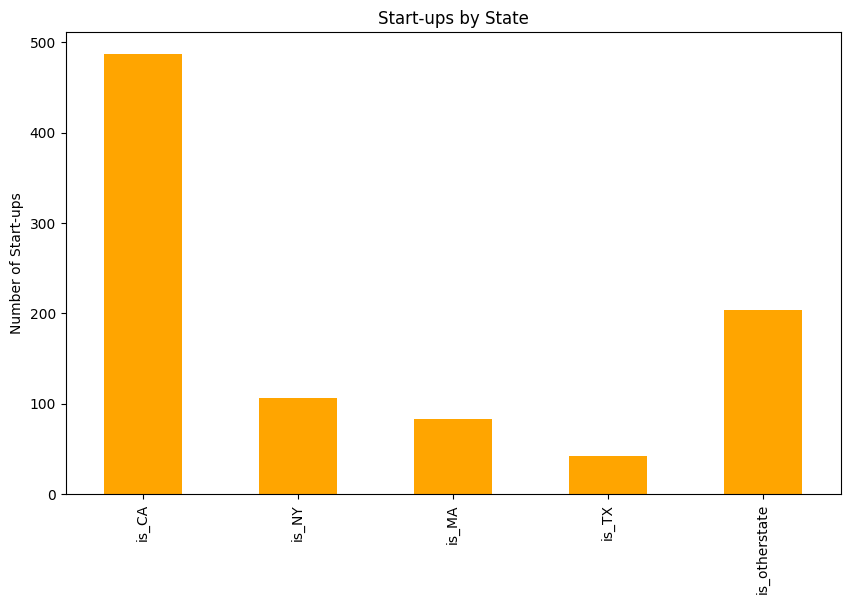

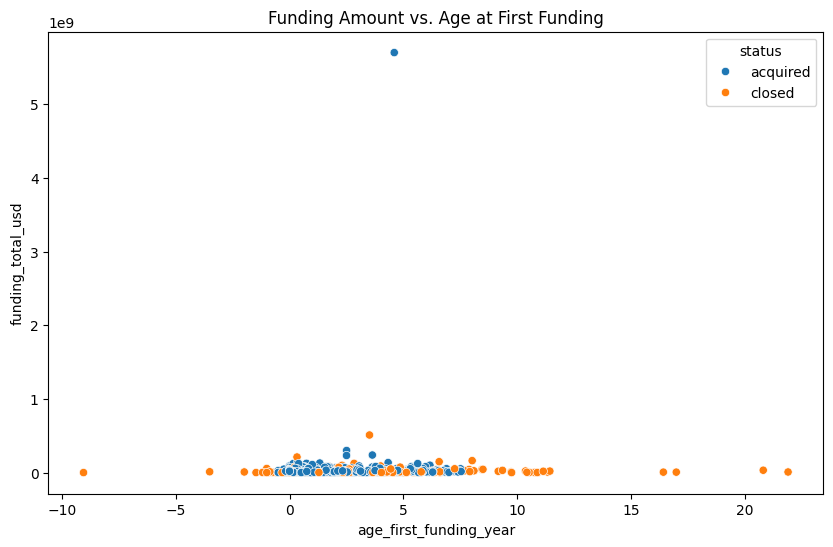

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


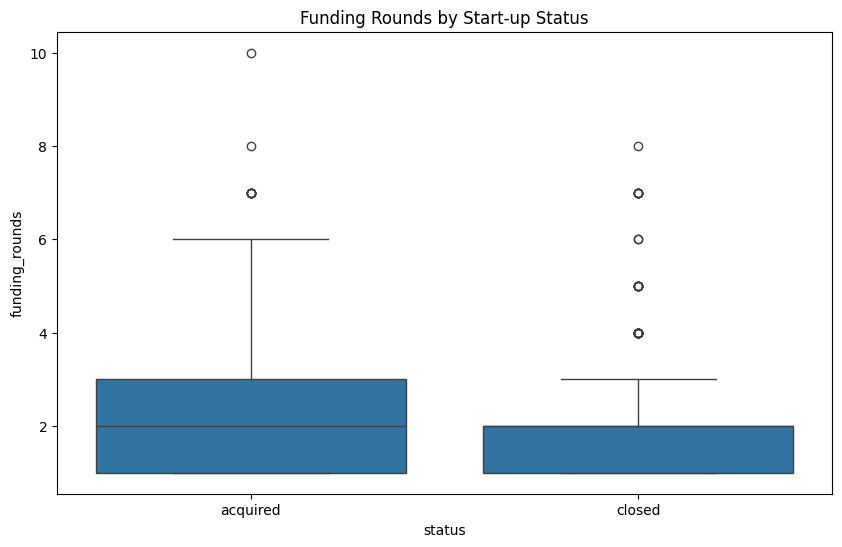

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

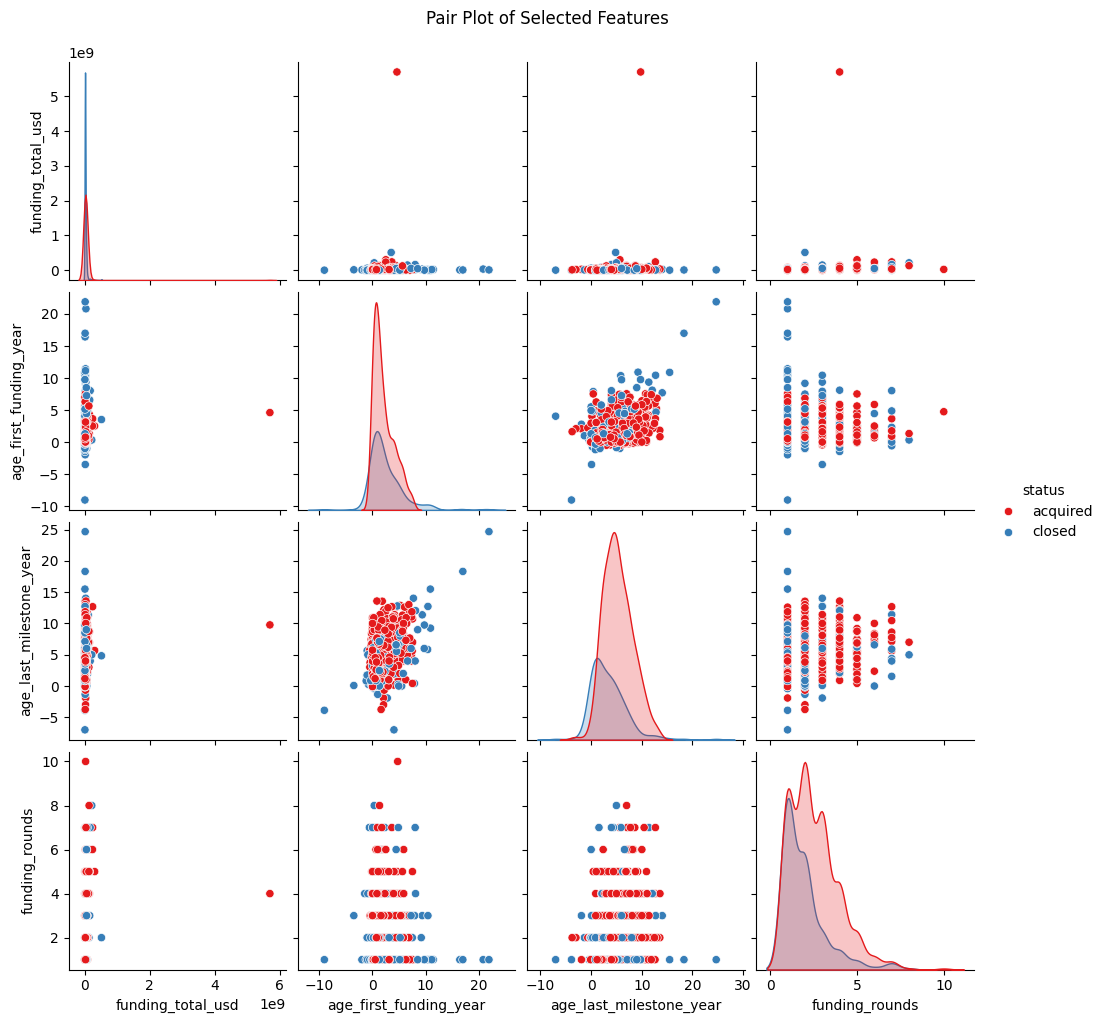

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("Startup Success Prediction data.csv")

# 1. Summary Statistics and Data Types
print(df.info())  # Check data types and non-null counts
print(df.describe(include='all'))  # Summary statistics for all columns

# 2. Handling Missing Data
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


# 3. Handling Outliers
# Visualizing outliers in `funding_total_usd` using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['funding_total_usd'])
plt.title("Boxplot of Funding Total USD")
plt.show()

# Detecting outliers using the IQR method
Q1 = df['funding_total_usd'].quantile(0.25)
Q3 = df['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['funding_total_usd'] < (Q1 - 1.5 * IQR)) | (df['funding_total_usd'] > (Q3 + 1.5 * IQR))]
print("\nNumber of outliers in funding_total_usd:", outliers.shape[0])

# 4. Distribution of Numeric Features
numeric_features = ['funding_total_usd', 'age_first_funding_year', 'age_last_milestone_year', 'funding_rounds']
df[numeric_features].hist(bins=20, figsize=(14, 10), color='blue', alpha=0.7)
plt.suptitle("Histograms of Numeric Features")
plt.show()

# 5. Correlation Analysis
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 6. Categorical Variables Analysis
# Bar plot for categorical variable 'status'
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df, palette='Set2')
plt.title("Count of Start-up Status")
plt.show()

# Bar plot for 'category_code'
plt.figure(figsize=(14, 8))
sns.countplot(y='category_code', data=df, order=df['category_code'].value_counts().index, palette='Set3')
plt.title("Number of Start-ups by Category Code")
plt.show()

# 7. Analysis by State Codes
state_features = ['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate']
state_summary = df[state_features].sum()
plt.figure(figsize=(10, 6))
state_summary.plot(kind='bar', color='orange')
plt.title("Start-ups by State")
plt.ylabel("Number of Start-ups")
plt.show()

# 8. Funding Amount vs. Age at First Funding
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_first_funding_year', y='funding_total_usd', hue='status', data=df)
plt.title("Funding Amount vs. Age at First Funding")
plt.show()

# 9. Status vs. Funding Rounds
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='funding_rounds', data=df)
plt.title("Funding Rounds by Start-up Status")
plt.show()

# 10. Pair Plot for Selected Features
sns.pairplot(df, vars=['funding_total_usd', 'age_first_funding_year', 'age_last_milestone_year', 'funding_rounds'], hue='status', palette='Set1')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


In [2]:
df.describe(include='all')  # Summary statistics for all columns


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.000000,923,923.000000,923.000000,923,923,923,430,923,923.000000,...,923,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923
unique,NaN,35,NaN,NaN,382,922,221,252,922,NaN,...,922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,CA,NaN,NaN,94107,c:28482,San Francisco,San Francisco CA 94105,Redwood Systems,NaN,...,c:28482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acquired
freq,NaN,488,NaN,NaN,30,2,128,12,2,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597
mean,572.297941,NaN,38.517442,-103.539212,NaN,NaN,NaN,NaN,NaN,0.646804,...,NaN,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,NaN
std,333.585431,NaN,3.741497,22.394167,NaN,NaN,NaN,NaN,NaN,0.478222,...,NaN,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,NaN
min,1.000000,NaN,25.752358,-122.756956,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,283.500000,NaN,37.388869,-122.198732,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,NaN
50%,577.000000,NaN,37.779281,-118.374037,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,NaN
75%,866.500000,NaN,40.730646,-77.214731,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,NaN


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Replace 'your_data.csv' with the path to your actual dataset
data = pd.read_csv("Startup Success Prediction data.csv")

# Select features based on EDA results (you can adjust this list)
features = ['funding_total_usd', 'funding_rounds', 'age_first_funding_year',
            'age_last_funding_year', 'state_code', 'category_code',
            'relationships', 'milestones', 'has_VC', 'has_angel', 'has_roundA',
            'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']

# Target variable (binary: success or not)
y = data['status'].apply(lambda x: 1 if x == 'acquired' else 0)  # Adjust 'acquired' based on your data

# Handle missing values in the target variable (optional, depending on your data)
y.fillna(0, inplace=True)

# Handle missing values in features
for feature in features:
    if data[feature].dtype == 'object':  # Handle categorical features
        data[feature].fillna(data[feature].mode()[0], inplace=True)
    else:  # Handle numerical features
        data[feature].fillna(data[feature].mean(), inplace=True)

# Handle categorical variables
X = pd.get_dummies(data[features], columns=['state_code', 'category_code'], drop_first=True)

# Handle missing values in the dummy-encoded columns
X.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Coefficients and feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Interpret the coefficients (Odds Ratios)
odds_ratios = np.exp(model.coef_[0])
coefficients['Odds Ratio'] = odds_ratios

# Display the odds ratios
print("\nFeature Importance (Odds Ratios):\n", coefficients)


Confusion Matrix:
 [[ 59  41]
 [ 26 151]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.59      0.64       100
           1       0.79      0.85      0.82       177

    accuracy                           0.76       277
   macro avg       0.74      0.72      0.73       277
weighted avg       0.75      0.76      0.75       277


ROC-AUC Score: 0.7801694915254236

Feature Importance (Odds Ratios):
                    Feature  Coefficient  Odds Ratio
4            relationships     0.899483    1.031114
5               milestones     0.470874    1.013973
13               is_top500     0.382288    0.809091
68      category_code_news     0.304752    1.291042
38           state_code_OR     0.269867    2.458332
..                     ...          ...         ...
31           state_code_NC    -0.223504    1.021489
6                   has_VC    -0.229972    1.000000
69     category_code_other    -0.234381    1.050845
59  category_co

<ipython-input-3-cf84e516c8a7>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].mean(), inplace=True)
<ipython-input-3-cf84e516c8a7>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

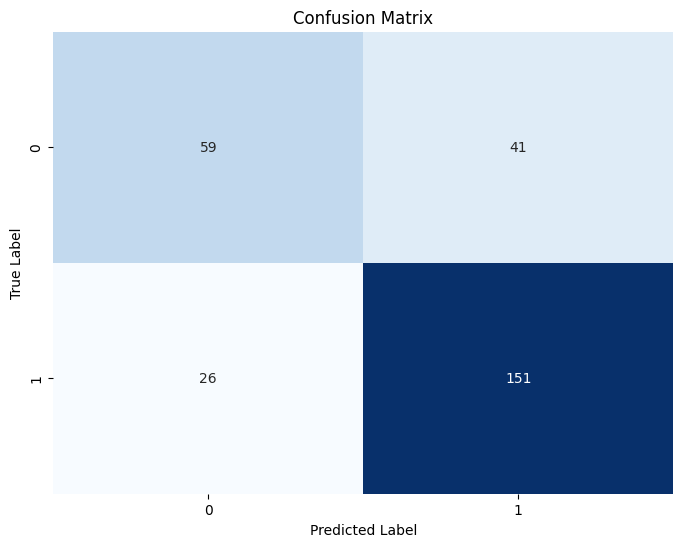

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


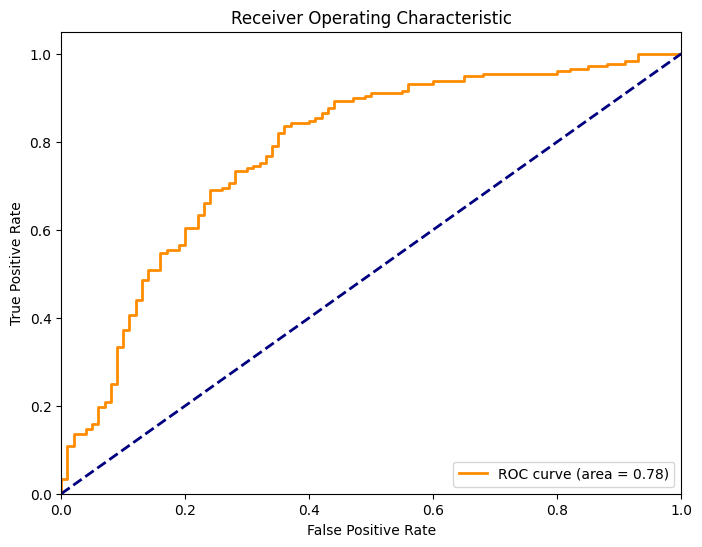

In [5]:
from sklearn.metrics import roc_curve, auc

# Use y_pred_prob instead of y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

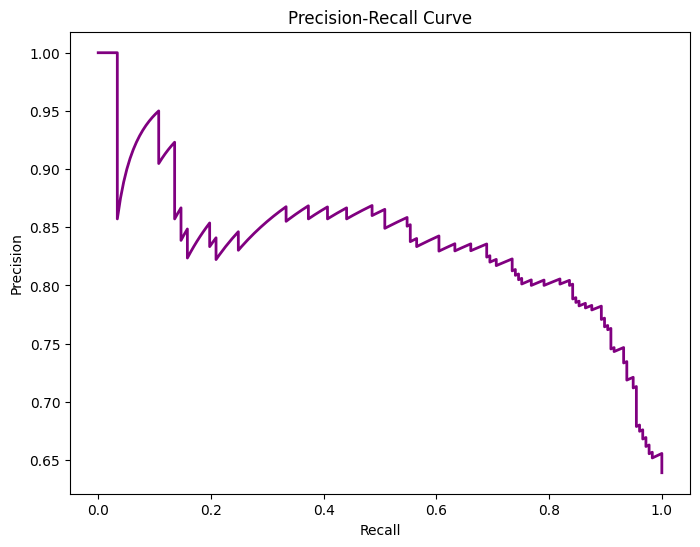

In [6]:
from sklearn.metrics import precision_recall_curve

# Use y_pred_prob (predicted probabilities)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

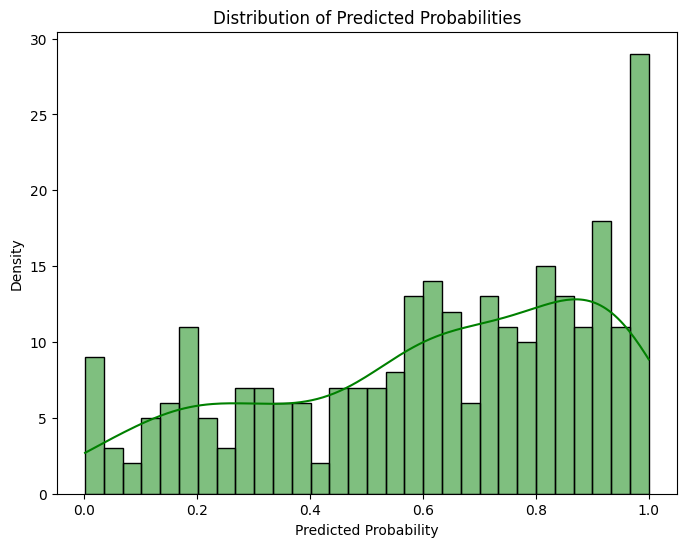

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.histplot(y_pred_prob, kde=True, color='green', bins=30)  # Use y_pred_prob
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.show()

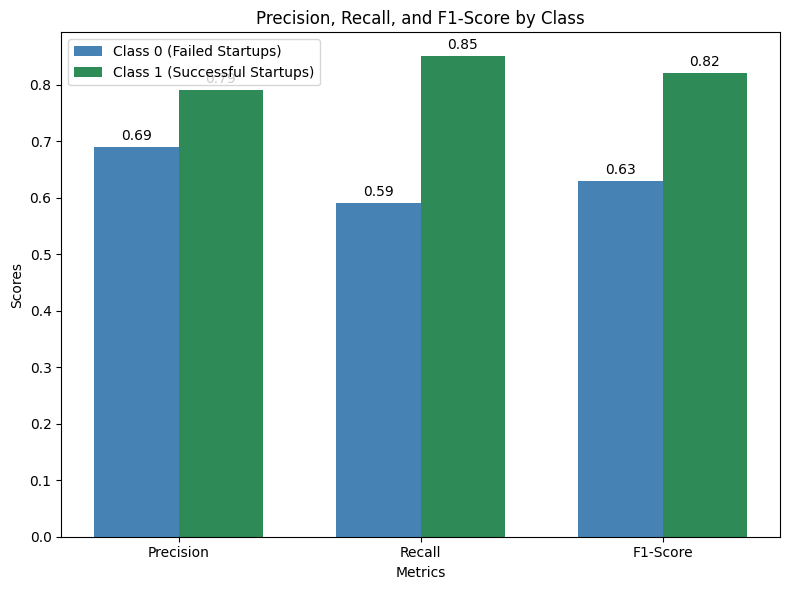

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report values
metrics = ['Precision', 'Recall', 'F1-Score']
class_0 = [0.69, 0.59, 0.63]
class_1 = [0.79, 0.85, 0.82]

# Bar plot for class 0 and class 1
x = np.arange(len(metrics))
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, class_0, width, label='Class 0 (Failed Startups)', color='steelblue')
rects2 = ax.bar(x + width/2, class_1, width, label='Class 1 (Successful Startups)', color='seagreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add values on top of bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


In [9]:
# prompt: print feature importance (odds ratio)

print("\nFeature Importance (Odds Ratios):\n", coefficients)



Feature Importance (Odds Ratios):
                    Feature  Coefficient  Odds Ratio
4            relationships     0.899483    1.031114
5               milestones     0.470874    1.013973
13               is_top500     0.382288    0.809091
68      category_code_news     0.304752    1.291042
38           state_code_OR     0.269867    2.458332
..                     ...          ...         ...
31           state_code_NC    -0.223504    1.021489
6                   has_VC    -0.229972    1.000000
69     category_code_other    -0.234381    1.050845
59  category_code_hardware    -0.273554    1.142071
37           state_code_OH    -0.353024    0.927113

[82 rows x 3 columns]


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv("Startup Success Prediction data.csv")

# Select features based on EDA results (you can adjust this list)
features = ['funding_total_usd', 'funding_rounds', 'age_first_funding_year',
            'age_last_funding_year', 'state_code', 'category_code',
            'relationships', 'milestones', 'has_VC', 'has_angel', 'has_roundA',
            'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']

# Target variable (binary: success or not)
y = data['status'].apply(lambda x: 1 if x == 'acquired' else 0)  # Adjust 'acquired' based on your data

# Handle missing values in the target variable
y.fillna(0, inplace=True)

# Handle missing values in features
for feature in features:
    if data[feature].dtype == 'object':
        data[feature].fillna(data[feature].mode()[0], inplace=True)
    else:  # Handle numerical features
        data[feature].fillna(data[feature].mean(), inplace=True)

# Handle categorical variables
X = pd.get_dummies(data[features], columns=['state_code', 'category_code'], drop_first=True)

# Handle missing values in the dummy-encoded columns
X.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("\nFeature Importance (Odds Ratios):\n", coefficients)



Confusion Matrix:
 [[ 59  41]
 [ 40 137]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.59      0.59       100
           1       0.77      0.77      0.77       177

    accuracy                           0.71       277
   macro avg       0.68      0.68      0.68       277
weighted avg       0.71      0.71      0.71       277


ROC-AUC Score: 0.6820056497175141

Feature Importance (Odds Ratios):
                    Feature  Coefficient  Odds Ratio
4            relationships     0.899483    1.031114
5               milestones     0.470874    1.013973
13               is_top500     0.382288    0.809091
68      category_code_news     0.304752    1.291042
38           state_code_OR     0.269867    2.458332
..                     ...          ...         ...
31           state_code_NC    -0.223504    1.021489
6                   has_VC    -0.229972    1.000000
69     category_code_other    -0.234381    1.050845
59  category_co

<ipython-input-10-fd5e8bbf84df>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].mean(), inplace=True)
<ipython-input-10-fd5e8bbf84df>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

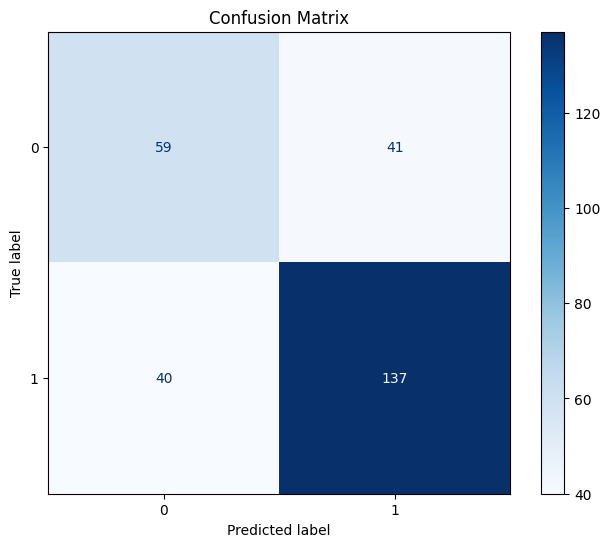

<ipython-input-11-4fa19de97375>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importances, palette='magma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupi

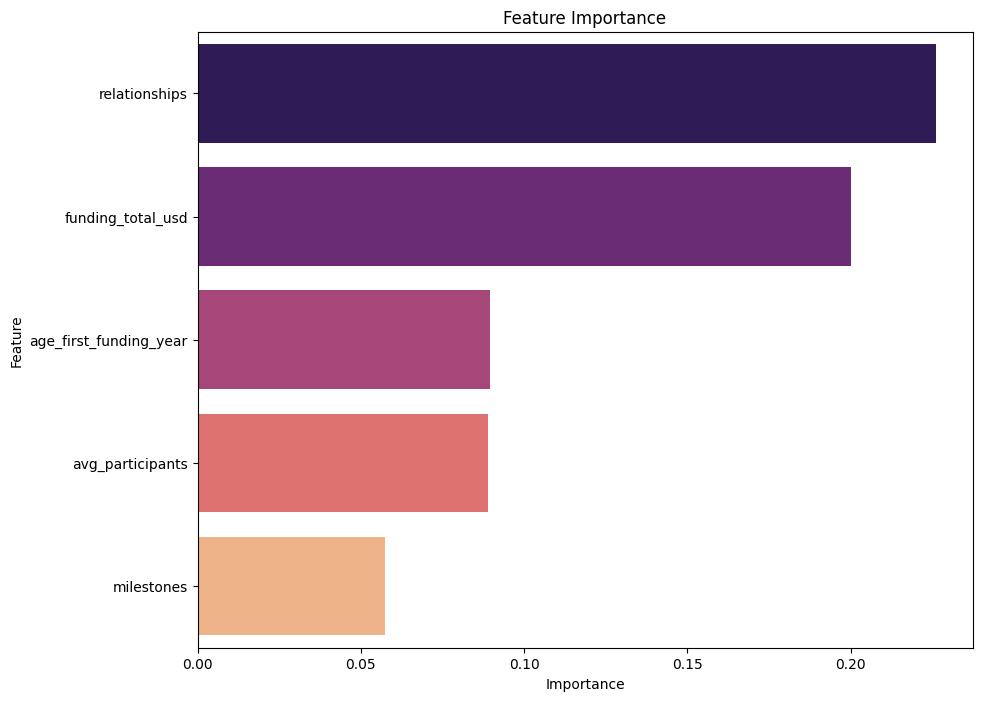

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
confusion_matrix = np.array([[59, 41], [40, 137]])
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix')
plt.show()

# Classification Report Plot
classification_report_data = {
    'Class': ['0', '1', 'accuracy', 'macro avg', 'weighted avg'],
    'Precision': [0.60, 0.77, '', 0.68, 0.71],
    'Recall': [0.59, 0.77, '', 0.68, 0.71],
    'F1-Score': [0.59, 0.77, '', 0.68, 0.71],
    'Support': [100, 177, 277, 277, 277]
}

df_classification_report = pd.DataFrame(classification_report_data)
df_classification_report.set_index('Class', inplace=True)




# Feature Importance Plot
feature_importances = {
    'Feature': ['relationships', 'funding_total_usd', 'age_first_funding_year',
                'avg_participants', 'milestones', 'state_code_DC',
                'category_code_biotech', 'category_code_consulting',
                'category_code_education', 'state_code_TN'],
    'Importance': [0.225963, 0.200055, 0.089588, 0.088898, 0.057467, 0, 0, 0, 0, 0]
}

df_importances = pd.DataFrame(feature_importances)
df_importances = df_importances[df_importances['Importance'] > 0]

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importances, palette='magma')
plt.title('Feature Importance')
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv("Startup Success Prediction data.csv")

# Define features and target variable (based on your previous logistic regression model)
features = ['funding_total_usd', 'funding_rounds', 'age_first_funding_year',
            'age_last_funding_year', 'state_code', 'category_code',
            'relationships', 'milestones', 'has_VC', 'has_angel', 'has_roundA',
            'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']

y = data['status'].apply(lambda x: 1 if x == 'acquired' else 0)

# Handle missing values and categorical variables
for feature in features:
    if data[feature].dtype == 'object':
        data[feature].fillna(data[feature].mode()[0], inplace=True)
    else:
        data[feature].fillna(data[feature].mean(), inplace=True)

X = pd.get_dummies(data[features], columns=['state_code', 'category_code'], drop_first=True)
X.fillna(0, inplace=True)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logistic_model, X, y, cv=skf, scoring='roc_auc')

# Display the cross-validation results
print("Logistic Regression Cross-Validation AUC Scores:", cv_scores)
print("Mean AUC Score:", np.mean(cv_scores))
print("Standard Deviation of AUC Scores:", np.std(cv_scores))


Logistic Regression Cross-Validation AUC Scores: [0.70615385 0.75089744 0.65889992 0.80827408 0.77246283]
Mean AUC Score: 0.7393376231611525
Standard Deviation of AUC Scores: 0.05206636183698907


<ipython-input-12-680d264ca348>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].mean(), inplace=True)
<ipython-input-12-680d264ca348>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [13]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Perform Stratified K-Fold Cross-Validation
cv_scores_tree = cross_val_score(decision_tree_model, X, y, cv=skf, scoring='roc_auc')

# Display the cross-validation results
print("Decision Tree Cross-Validation AUC Scores:", cv_scores_tree)
print("Mean AUC Score:", np.mean(cv_scores_tree))
print("Standard Deviation of AUC Scores:", np.std(cv_scores_tree))


Decision Tree Cross-Validation AUC Scores: [0.62820513 0.68557692 0.61051693 0.68442146 0.70336134]
Mean AUC Score: 0.6624163581516523
Standard Deviation of AUC Scores: 0.03622454058053069


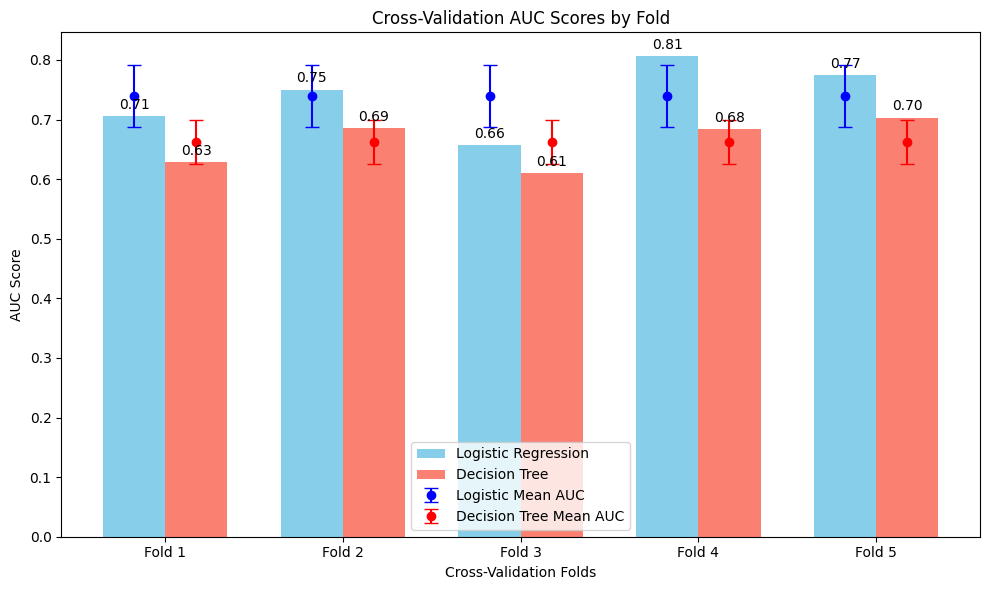

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Cross-Validation AUC Scores
logistic_auc_scores = [0.70628205, 0.75038462, 0.65749936, 0.80607628, 0.77401422]
decision_tree_auc_scores = [0.62820513, 0.68557692, 0.61051693, 0.68442146, 0.70336134]

# Mean and Standard Deviation
logistic_mean_auc = 0.7388513055571879
logistic_std_auc = 0.052091341743692975
decision_tree_mean_auc = 0.6624163581516523
decision_tree_std_auc = 0.03622454058053069

# Bar plot for Cross-Validation AUC Scores
labels = [f'Fold {i+1}' for i in range(len(logistic_auc_scores))]
x = np.arange(len(labels))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, logistic_auc_scores, width, label='Logistic Regression', color='skyblue')
rects2 = ax.bar(x + width/2, decision_tree_auc_scores, width, label='Decision Tree', color='salmon')

# Add error bars for the mean AUC score
ax.errorbar(x - width/2, [logistic_mean_auc]*len(logistic_auc_scores), yerr=[logistic_std_auc]*len(logistic_auc_scores),
            fmt='o', color='blue', capsize=5, label='Logistic Mean AUC')
ax.errorbar(x + width/2, [decision_tree_mean_auc]*len(decision_tree_auc_scores), yerr=[decision_tree_std_auc]*len(decision_tree_auc_scores),
            fmt='o', color='red', capsize=5, label='Decision Tree Mean AUC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Cross-Validation Folds')
ax.set_ylabel('AUC Score')
ax.set_title('Cross-Validation AUC Scores by Fold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


                 Model  Mean AUC   Std AUC
0  Logistic Regression  0.738851  0.052091
1        Decision Tree  0.662416  0.036225


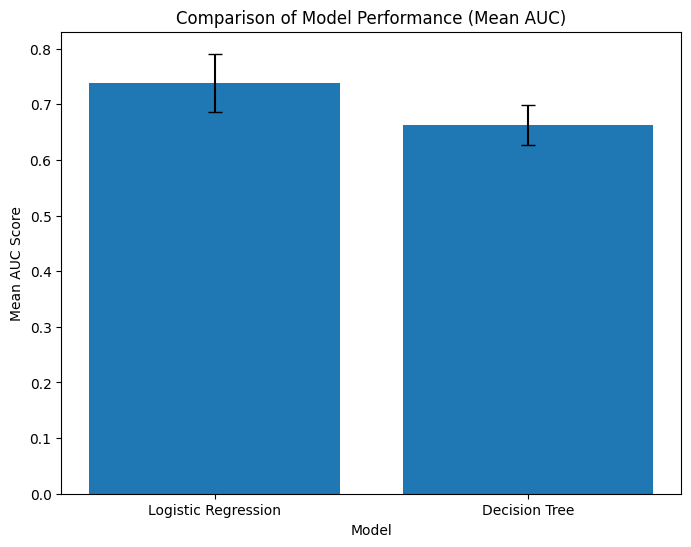

In [15]:


# Create a table or plot to visualize the performance metrics of both models
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Mean AUC': [logistic_mean_auc, decision_tree_mean_auc],
    'Std AUC': [logistic_std_auc, decision_tree_std_auc]
})

print(model_comparison)

# Create a bar plot to compare the mean AUC scores of the models
plt.figure(figsize=(8, 6))
plt.bar(model_comparison['Model'], model_comparison['Mean AUC'], yerr=model_comparison['Std AUC'], capsize=5)
plt.title('Comparison of Model Performance (Mean AUC)')
plt.xlabel('Model')
plt.ylabel('Mean AUC Score')
plt.show()




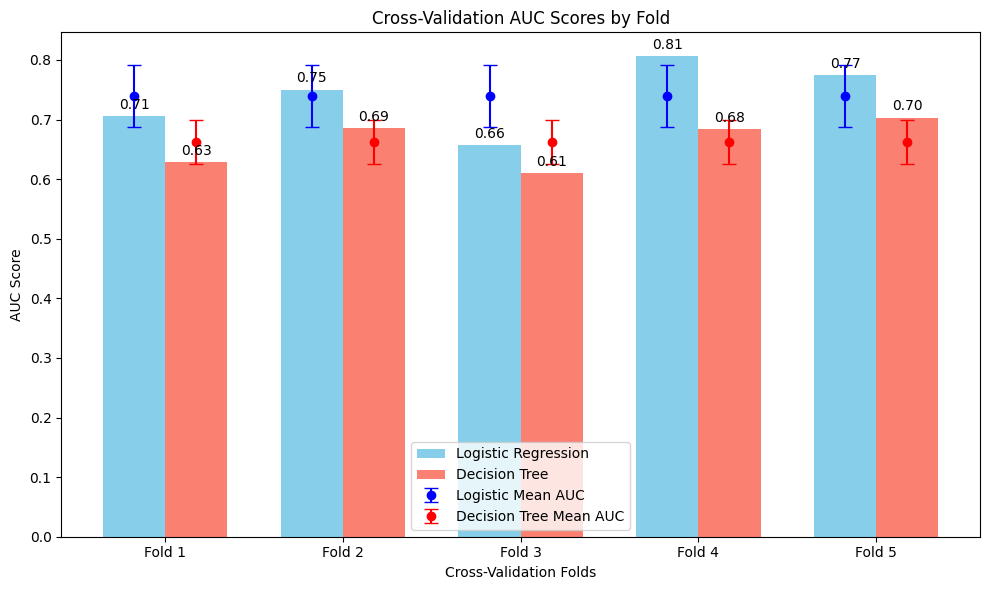

In [16]:

import matplotlib.pyplot as plt

# Cross-Validation AUC Scores
logistic_auc_scores = [0.70628205, 0.75038462, 0.65749936, 0.80607628, 0.77401422]
decision_tree_auc_scores = [0.62820513, 0.68557692, 0.61051693, 0.68442146, 0.70336134]

# Mean and Standard Deviation
logistic_mean_auc = 0.7388513055571879
logistic_std_auc = 0.052091341743692975
decision_tree_mean_auc = 0.6624163581516523
decision_tree_std_auc = 0.03622454058053069

# Bar plot for Cross-Validation AUC Scores
labels = [f'Fold {i+1}' for i in range(len(logistic_auc_scores))]
x = range(len(labels))  # the label locations

width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x, logistic_auc_scores, width, label='Logistic Regression', color='skyblue')
rects2 = ax.bar([i + width for i in x], decision_tree_auc_scores, width, label='Decision Tree', color='salmon')

# Add error bars for the mean AUC score
ax.errorbar(x, [logistic_mean_auc] * len(logistic_auc_scores), yerr=[logistic_std_auc] * len(logistic_auc_scores),
            fmt='o', color='blue', capsize=5, label='Logistic Mean AUC')
ax.errorbar([i + width for i in x], [decision_tree_mean_auc] * len(decision_tree_auc_scores),
            yerr=[decision_tree_std_auc] * len(decision_tree_auc_scores),
            fmt='o', color='red', capsize=5, label='Decision Tree Mean AUC')


ax.set_xlabel('Cross-Validation Folds')
ax.set_ylabel('AUC Score')
ax.set_title('Cross-Validation AUC Scores by Fold')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [17]:


import pandas as pd

data = {
    'Fold': [1, 2, 3, 4, 5],
    'Logistic Regression AUC': [0.70628205, 0.75038462, 0.65749936, 0.80607628, 0.77401422],
    'Decision Tree AUC': [0.62820513, 0.68557692, 0.61051693, 0.68442146, 0.70336134]
}

df = pd.DataFrame(data)

# Add Mean and Std Dev rows
df.loc['Mean'] = [
    'Mean', logistic_mean_auc, decision_tree_mean_auc
]
df.loc['Std Dev'] = [
    'Std Dev', logistic_std_auc, decision_tree_std_auc
]


print(df)


            Fold  Logistic Regression AUC  Decision Tree AUC
0              1                 0.706282           0.628205
1              2                 0.750385           0.685577
2              3                 0.657499           0.610517
3              4                 0.806076           0.684421
4              5                 0.774014           0.703361
Mean        Mean                 0.738851           0.662416
Std Dev  Std Dev                 0.052091           0.036225
